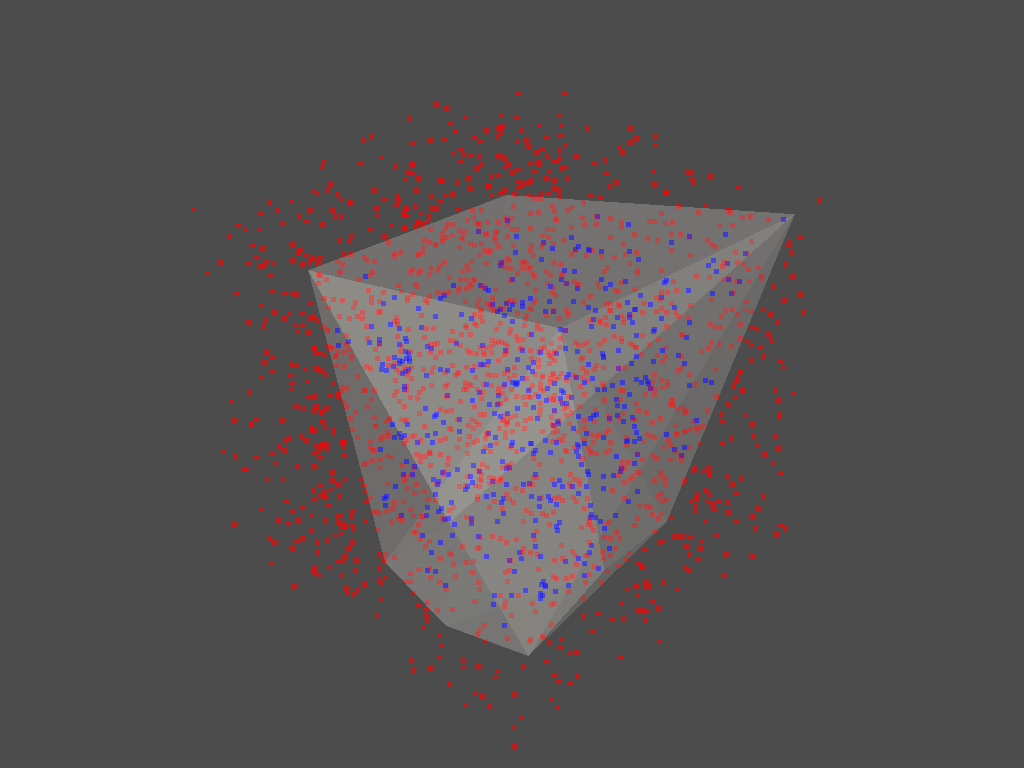

In [8]:
import numpy as np
tested = np.random.rand(2000,3)
cloud  = np.random.rand(10,3)

# https://stackoverflow.com/questions/16750618/whats-an-efficient-way-to-find-if-a-point-lies-in-the-convex-hull-of-a-point-cl
from scipy.spatial import Delaunay, ConvexHull
hull = Delaunay(cloud)
tested_in_hull = hull.find_simplex(tested) >= 0

import pyvista as pv

def polyhull(points):
    # https://gist.github.com/flutefreak7/bd621a9a836c8224e92305980ed829b9
    hull = ConvexHull(points)
    faces = np.column_stack((3*np.ones((len(hull.simplices), 1), dtype=np.int), hull.simplices)).flatten()
    poly = pv.PolyData(hull.points, faces)
    return poly

fig = pv.Plotter()
fig.add_mesh(pv.PolyData(tested[tested_in_hull]), color='blue', opacity = 0.9)
fig.add_mesh(pv.PolyData(tested[~tested_in_hull]), color='red', opacity = 0.6)
fig.add_mesh(polyhull(cloud), color='white', opacity = 0.3)
fig.screenshot("3d-points.png")
fig.show()